# "NLP: Twitter Sentiment Analysis"

Task #1: Understand the Problem Statement and business case

Task #2: Import libraries and datasets

Task #3: Perform Exploratory Data Analysis

Task #4: Plot the WORD CLOUD

Task #5: Perform Data Cleaning - REMOVE PUNCTUATION FROM TEXT

Task #6: Perform Data Cleaning - REMOVE STOPWORDS

Task #7: Prepare the data by applying count vectorizer

Task #8: Understand the theory and intuition behind Naive Bayes Classifiers - Part #1

Task #9: Understand the theory and intuition behind Naive Bayes Classifiers - Part #2

Task #10: Understand the theory and intuition behind Naive Bayes classifiers

Task #11: Train a Naive Bayes Classifier

Task #12: Assess trained model performance

In [1]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
sentence="Elon Musk has apologized after publicly scoffing at a Twitter employee’s uncertainty about whether he had been laid off in a recent round of cuts and speaking dismissively of the employee’s disability in a series of tweets Monday night.I would like to apologize to Halli for my misunderstanding of his situation. It was based on things I was told that were untrue or, in some cases, true, but not meaningful,” Musk tweeted Tuesday. “He is considering remaining at Twitter"

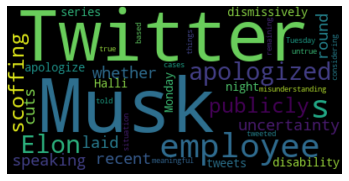

In [3]:
my_cloud=WordCloud().generate(sentence)
plt.imshow(my_cloud,interpolation="bilinear")
plt.axis("off")
plt.show()

## Task #2: Import libraries and datasets/Analyzing Dataset

In [255]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
from wordcloud import WordCloud
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 

In [256]:
tweets_df=pd.read_csv("twitter.csv")
tweets_df

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
9994,9995,1,are you #black &amp; feel like the are stompi...
9995,9996,0,@user my routine is out of whack! evening wal...
9996,9997,0,i'm dead but still happy #poledance #madrid ##...
9997,9998,0,â #united kingdom claimant count rate up to...


In [257]:
tweets_df.columns

Index(['id', 'label', 'tweet'], dtype='object')

In [258]:
tweets_df[tweets_df['label']==1].count()

id       695
label    695
tweet    695
dtype: int64

In [259]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 3 columns):
id       9999 non-null int64
label    9999 non-null int64
tweet    9999 non-null object
dtypes: int64(2), object(1)
memory usage: 195.4+ KB


In [260]:
tweets_df.describe()

,id,label
count,9999.000000,9999.000000
mean,5000.736974,0.069507
std,2888.823248,0.254327
min,1.000000,0.000000
25%,2500.500000,0.000000
50%,5000.000000,0.000000
75%,7499.500000,0.000000
max,17368.000000,1.000000


In [261]:
tweets_df['tweet']

0        @user when a father is dysfunctional and is s...
1       @user @user thanks for #lyft credit i can't us...
2                                     bihday your majesty
3       #model   i love u take with u all the time in ...
4                  factsguide: society now    #motivation
                              ...                        
9994    are you #black &amp; feel like the  are stompi...
9995     @user my routine is out of whack! evening wal...
9996    i'm dead but still happy #poledance #madrid ##...
9997     â #united kingdom claimant count rate up to...
9998    #vehicle   gorilla simulator: you need to do t...
Name: tweet, Length: 9999, dtype: object

In [262]:
tweets_df.drop(['id'],axis=1,inplace=True)

In [263]:
tweets_df

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
...,...,...
9994,1,are you #black &amp; feel like the are stompi...
9995,0,@user my routine is out of whack! evening wal...
9996,0,i'm dead but still happy #poledance #madrid ##...
9997,0,â #united kingdom claimant count rate up to...


## Task #3: Perform Exploratory Data Analysis

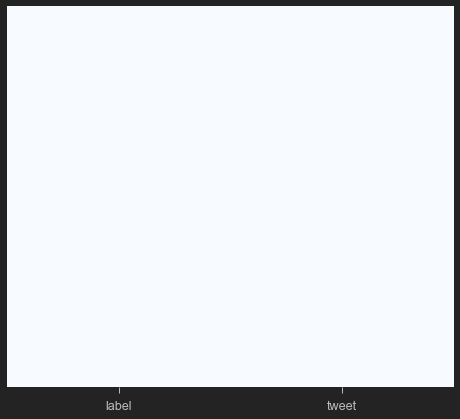

In [264]:
# Wanted to check that is there any NULL values in our dataset

sns.heatmap(tweets_df.isnull(),yticklabels=False,cbar=False,cmap="Blues")

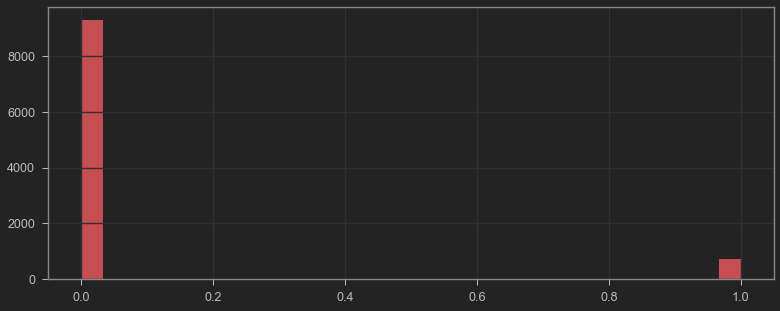

In [265]:
# Plot the histogram
tweets_df['label'].hist(bins = 30, figsize = (13,5), color = 'r')

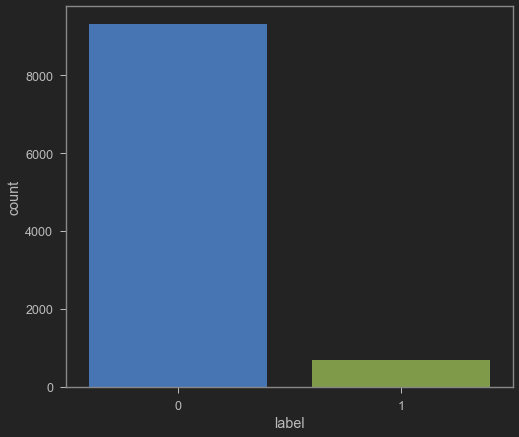

In [266]:
# Plot the CountPlot
sns.countplot(data=tweets_df, x='label') 

In [267]:
# Adding new length column in the dataset
tweets_df['length']=tweets_df['tweet'].apply(len)
tweets_df 

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39
...,...,...,...
9994,1,are you #black &amp; feel like the are stompi...,88
9995,0,@user my routine is out of whack! evening wal...,120
9996,0,i'm dead but still happy #poledance #madrid ##...,90
9997,0,â #united kingdom claimant count rate up to...,106


In [268]:
tweets_df.describe()

,label,length
count,9999.000000,9999.000000
mean,0.069507,85.213121
std,0.254327,28.978707
min,0.000000,12.000000
25%,0.000000,64.000000
50%,0.000000,88.000000
75%,0.000000,108.000000
max,1.000000,169.000000


In [269]:
# Finding out the Tweet which has minimum Value
tweets_df[tweets_df['length']==tweets_df['length'].min()]

,label,tweet,length
3397,1,shut up rat,12
4411,0,no 1 is up,12
9130,0,got this on,12


In [270]:
tweets_df[tweets_df['length']==round(tweets_df['length'].mean())]

,label,tweet,length
115,0,â #under the spell of brexit referendum - c...,85
242,0,make today count! #mondaymotivation #livelifet...,85
384,0,"dream palace, can we move in already? #stellar...",85
573,0,@user monkeys are also declared as vermin. no ...,85
634,0,save thousands $$ free search x logins x broke...,85
...,...,...,...
9707,0,rss|xactaccounts| #tinyplanet #love #picofthed...,85
9715,0,"@user #daddysays if you leave from me, you'...",85
9923,0,forget cleaning up after people natalie needs ...,85
9953,0,porait of femi festus _______________________...,85


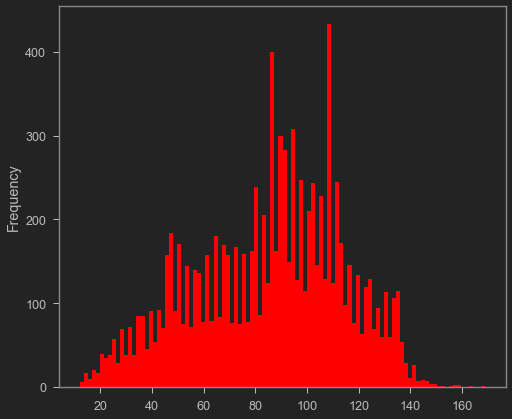

In [271]:
tweets_df['length'].plot(bins=100,kind='hist',color='red')

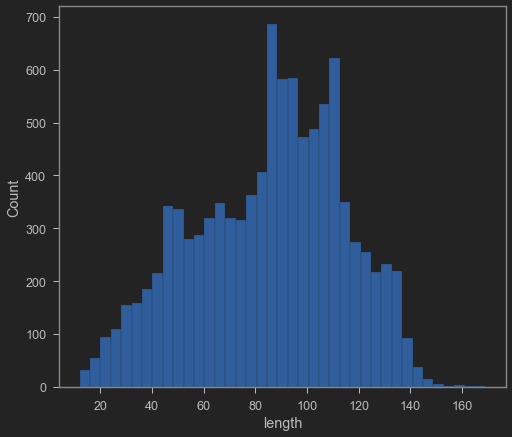

In [272]:
sns.histplot(data=tweets_df,x='length')

## Task #4: Plot the WORD CLOUD

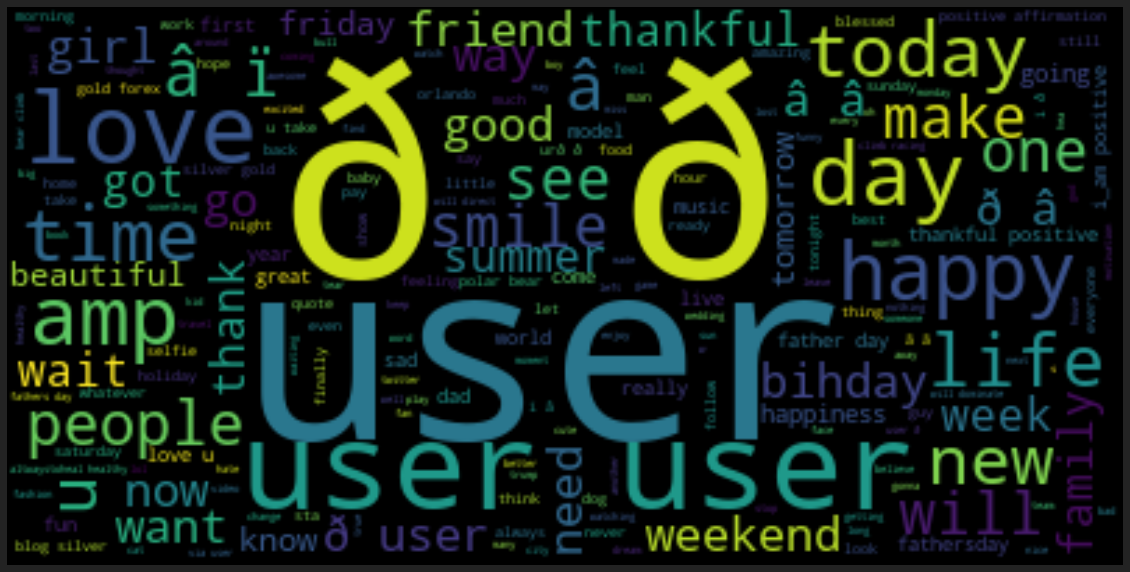

In [273]:
# generating positive cloud by using negative tweets

positive=tweets_df[tweets_df['label']==0] # finding out the positive tweets

positive_tweets=positive['tweet'].to_list() # converting positive tweets into list
all_in_one_positive_tweets=" ".join(positive_tweets) # joining all the list to make a sentence

positive_wordcloud=WordCloud().generate(all_in_one_positive_tweets) # now generating cloud

plt.figure(figsize=(20,20))
plt.imshow(positive_wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()


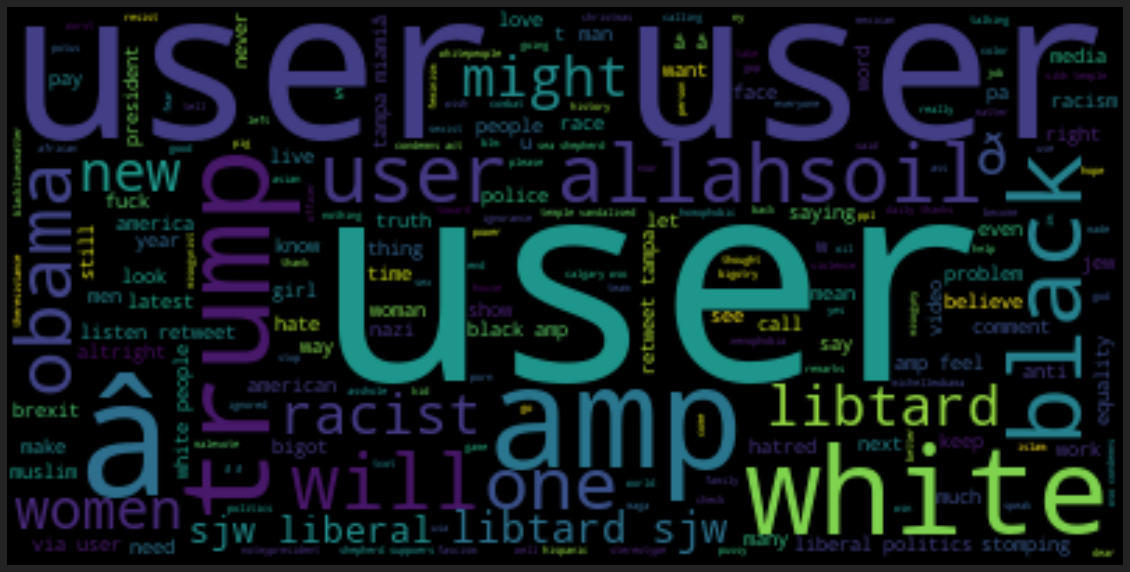

In [274]:
# generating negative cloud by using negative tweets

negative=tweets_df[tweets_df['label']==1] # finding out the negative tweets
negative_tweets=negative['tweet'].tolist() # converting negative tweets into list
all_in_one_negative_tweets=" ".join(negative_tweets) # joining all the list to make a sentence

negative_cloud=WordCloud().generate(all_in_one_negative_tweets) # now generating cloud

plt.figure(figsize=(20,20))
plt.imshow(negative_cloud,interpolation='bilinear')
plt.axis("off")
plt.show()

## Task #5: Perform Data Cleaning - REMOVE PUNCTUATION FROM TEXT

In [275]:
import string

string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [276]:
#new_data=[]
#for row in tweets_df['tweet']:    
    #new_data.append(row.translate(str.maketrans('', '', string.punctuation)))
#tweets_df['tweet']=new_data
#tweets_df

message='Good morning beautiful people :)... I am having fun learning Machine learning and AI!!'
without_punctuation=[word for word in message.split() if word.lower() not in stopwords.words('english')]
without_punctuation=' '.join(without_punctuation)
without_punctuation



'Good morning beautiful people :)... fun learning Machine learning AI!!'

## TASK #6: Perform Data Cleaning - REMOVE STOPWORDS

In [277]:
import nltk # Natural Language tool kit 
nltk.download('stopwords')

# You have to download stopwords Package to execute this command
from nltk.corpus import stopwords
#stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sabhe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [278]:
#final_sentence=[]

#for row in tweets_df['tweet']:
    #filtered_sentence=[]
    #word_tokens=row.split(' ') 
       
    #for word in word_tokens:    
        #if word.lower() not in stopwords.words('english'):
            #filtered_sentence.append(word)
    #final_sentence.append(filtered_sentence)
#tweets_df['tweets_with_tokens']=filtered_sentence

# tweets_df['tweet_without_stopwords'] = tweets_df['tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords.words('english')]))



In [279]:
final_sentence=[  word for word in without_punctuation.split() if word.lower() not in stopwords.words('english')  ] 
final_sentence


['Good',
 'morning',
 'beautiful',
 'people',
 ':)...',
 'fun',
 'learning',
 'Machine',
 'learning',
 'AI!!']

## Task #7: Prepare the data by applying count vectorizer

In [280]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer=CountVectorizer()
X = vectorizer.fit_transform(final_sentence)
print(vectorizer.get_feature_names())

['ai', 'beautiful', 'fun', 'good', 'learning', 'machine', 'morning', 'people']


c:\Users\sabhe\AppData\Local\Programs\Python\Python37-32\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [246]:
print(X.toarray())

[[0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 1 0 0 0]
 [1 0 0 0 0 0 0 0]]


# TASK #8: CREATE A PIPELINE TO REMOVE PUNCTUATIONS, STOPWORDS AND PERFORM COUNT VECTORIZATION

In [281]:
# Let's define a pipeline to clean up all the messages 
# The pipeline performs the following: (1) remove punctuation, (2) remove stopwords

def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

In [282]:
# Let's test the newly added function
tweets_df_clean = tweets_df['tweet'].apply(message_cleaning)

In [283]:
print(tweets_df_clean[0]) # show the cleaned up version

['user', 'father', 'dysfunctional', 'selfish', 'drags', 'kids', 'dysfunction', 'run']


In [284]:
print(tweets_df['tweet'][0]) # show the original version

 @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run


In [285]:
from sklearn.feature_extraction.text import CountVectorizer
# Define the cleaning pipeline we defined earlier
vectorizer = CountVectorizer(analyzer = message_cleaning, dtype = np.uint8)
tweets_countvectorizer = vectorizer.fit_transform(tweets_df['tweet'])

In [ ]:
#print(vectorizer.get_feature_names())

In [286]:
print(tweets_countvectorizer.toarray())  

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [287]:
tweets_countvectorizer.shape

(9999, 21717)

In [288]:
X = pd.DataFrame(tweets_countvectorizer.toarray())

In [289]:
X

,0,1,2,3,4,5,6,7,8,9,...,21707,21708,21709,21710,21711,21712,21713,21714,21715,21716
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [290]:
X.shape

(9999, 21717)